# numpy形式の画像データをpng形式の画像として出力する方法

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import glob
import os,sys
from sklearn.preprocessing import LabelBinarizer

dic_katakana = {"a":0,"i":1,"u":2,"e":3,"o":4,"ka":5,"ki":6,"ku":7,"ke":8,"ko":9,"sa":10,"si":11,"su":12,"se":13,"so":14}
pixel = 28

try:
    from google.colab import files
    print('Google Colab. 上での実行です')
    print('「ファイルを選択」から、1_dataのtrain_data.npy、train_label.npyを選択し、アップロードしてください')
    print('===========')
    files.upload()
    !mkdir ../1_data
    !mv *.npy ../1_data
except:
    print('ローカル環境での実行です')



ローカル環境での実行です


## データの読み込み

In [2]:
train_data = np.load("../1_data/train_data.npy")
train_label = np.load("../1_data/train_label.npy")
print(train_data.shape)
print(train_label.shape)

(3000, 1, 28, 28)
(3000, 15)


## numpy形式の画像をpng形式で出力する方法

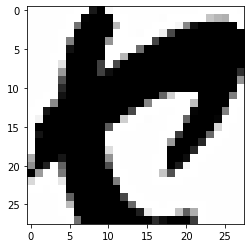

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm

ind = 0

# 画像
img = train_data[ind,:,:,:,]
plt.imshow(img[0,:,:], cmap='gray')
plt.show()

# ラベル
label_int = np.argmax(train_label [ind])
for key, value in dic_katakana.items():
    if value==label_int:
        label_str = key
        break

# 出力
img = Image.fromarray(np.uint8(img.reshape(28,28)))
img.save("%s.png"%label_str)

### 出力したpng形式を読み込んでみる

(1, 1, 28, 28)


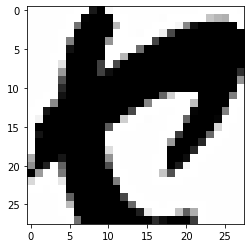

In [4]:
# ファイル名
fname = "%s.png"%label_str

# numpy形式に変換
num_image = 1
channel = 1 # グレースケール
data = np.empty((num_image, channel, pixel, pixel))

# カタカナ文字
label_str = fname.split(".png")[0]
label_int = dic_katakana[label_str]

img_ = Image.open(fname)
img_ = np.array(img_).astype(np.float32)
data[0, 0, :] = img_

print(data.shape)

# 読み込んだ画像を表示する
plt.imshow(data[0,0,:,:], cmap='gray')
plt.show()

In [5]:
data.shape

(1, 1, 28, 28)